## Goal
- Implement classification with resnet18 in tinyImagenet dataset using d2l library
    - Wrap tiny imagenet data under d2l library
    - Fit with GPU
    - Record validation losses, accuracy, time taken to train

In [1]:
import torch
import time
import d2l.torch as d2l
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from d2l_data import TinyImagenetD2l
from models import ResnetD2l

In [2]:
batch_size = 256
num_workers = 2
learning_rate = 0.01
num_epochs = 20
device = d2l.try_gpu()
device

device(type='cuda', index=0)

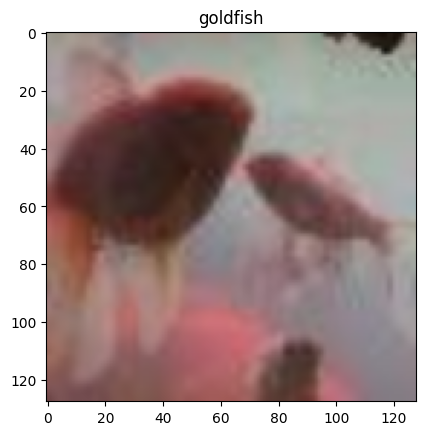

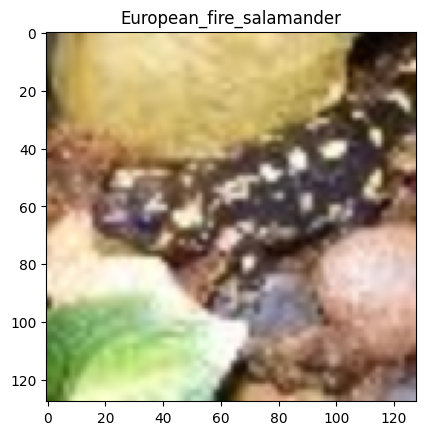

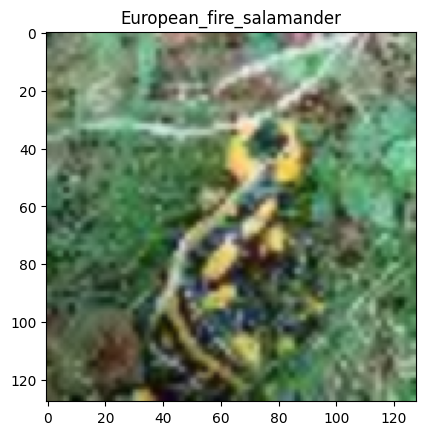

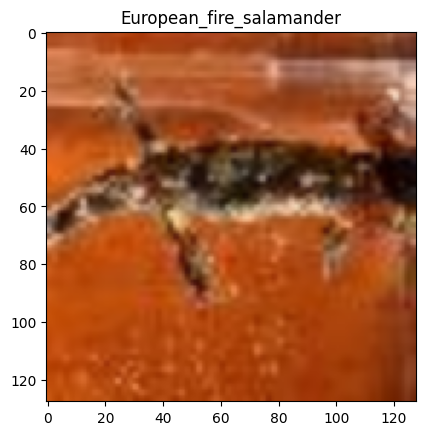

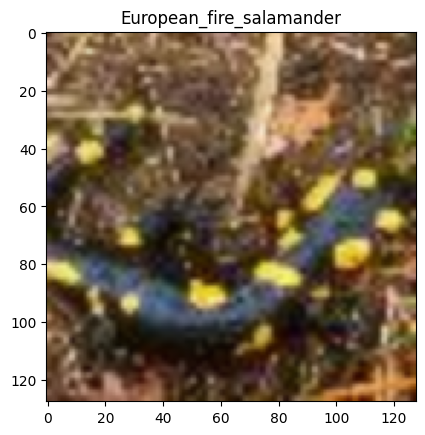

In [3]:
tiny_imagenet = TinyImagenetD2l(batch_size=batch_size, num_workers=num_workers,is_toy=True, is_ddp=False)
batch = next(iter(tiny_imagenet.get_dataloader(train=True)))
tiny_imagenet.visualize(batch=batch, max_images=5)


In [4]:
from trainer import CustomTrainer
data = TinyImagenetD2l(batch_size, num_workers, is_toy=True)
num_training_batches = len(data.train_data)
num_val_batches = len(data.val_data)
model = ResnetD2l(num_classes=data.num_classes, pretrained=False, lr=learning_rate)
model.to(device)

trainer = CustomTrainer(max_epochs=num_epochs, num_gpus=1, title=f"TinyImagenet_is_toy_{data.is_toy}_lr_{learning_rate}", plot_every_n_steps=1)
trainer.device = device
trainer.fit(model=model, data=data)

model.display_metrics()




/home/ajrfhp/anaconda3/envs/GPT2/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ajrfhp/anaconda3/envs/GPT2/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/ajrfhp/anaconda3/envs/GPT2/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ajrfhp/anaconda3/envs/GPT2/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ajrfhp/LearningDeepLearning/distributed_training/models.py:150: UserWarn

loss - train: 3.0611600279808044, val: 3.7305941581726074
accuracy - train: 0.5011112540960312, val: 0.5
loss - train: 0.4524322599172592, val: 2.426419496536255
accuracy - train: 0.8977640122175217, val: 0.5
loss - train: 0.2303433194756508, val: 2.390303134918213
accuracy - train: 0.9475350230932236, val: 0.5
loss - train: 0.1747058928012848, val: 2.298658847808838
accuracy - train: 0.9521147608757019, val: 0.5
loss - train: 0.14415070600807667, val: 2.4078714847564697
accuracy - train: 0.9571996182203293, val: 0.5
loss - train: 0.10728476382791996, val: 1.5983216762542725
accuracy - train: 0.978010505437851, val: 0.5
loss - train: 0.08142921328544617, val: 0.8216772675514221
accuracy - train: 0.9821188002824783, val: 0.6399999856948853
loss - train: 0.07552545890212059, val: 0.27498483657836914
accuracy - train: 0.9805361032485962, val: 0.9099999666213989
loss - train: 0.08155356626957655, val: 0.2166549563407898
accuracy - train: 0.9751818478107452, val: 0.9300000071525574
loss - t